In [1]:
import pandas as pd

In [2]:
#pd.options.display.max_columns = None
pd.options.display.max_rows = None

First match label and column names in the dataset together, for easier feature choosing

In [3]:
label = []
#SAS Variable Name
VarName = []
with open("USCODE22_LLCP_102523.txt", "r") as f:

    lines = f.readlines()
    #print(lines)
    
    for index,item in enumerate(lines): # every row in txt file
        #print(item)
        #print(index)
        if 'Label:' in item:
            #print(item)
            
            label_temp = item.split(':') # Label: State FIPS Code
            #print(SectionName_temp)
            
            label_temp[1] = label_temp[1][:-1]
            
            label.append(label_temp[1])
            
        if 'SAS Variable Name:' in item:
            #print(item)
            
            VarName_temp = item.split(':') # SAS Variable Name: _STATE
            #print(SectionName_temp)
            
            VarName_temp[1] = VarName_temp[1][:-1] # remove \n
            
            VarName.append(VarName_temp[1])
    

In [4]:
codebook = pd.DataFrame([label,VarName])
cb = codebook.T
cb.columns = ['Label','Variable']
cb

,Label,Variable
0,State FIPS Code,_STATE
1,File Month,FMONTH
2,Interview Date,IDATE
3,Interview Month,IMONTH
4,Interview Day,IDAY
5,Interview Year,IYEAR
6,Final Disposition,DISPCODE
7,Annual Sequence Number,SEQNO
8,Primary Sampling Unit,_PSU
9,Correct telephone number?,CTELENM1


In [5]:
features_2015 = []
with open("features_2015.txt", "r") as f:

    lines = f.readlines()

    for index,item in enumerate(lines): # every row in txt file
        
        features_2015.append(item[:-1])
features_2015

['blood pressure',
 'cholesterol',
 'smoking',
 'diabetes',
 'obesity',
 'age',
 'sex',
 'race',
 'diet',
 'exercise',
 'alcohol consumption',
 'BMI',
 'Household Income',
 'Marital Status',
 'Sleep',
 'Time since last checkup',
 'Education',
 'Health care coverage',
 'Mental Healt']

In [6]:
choose = pd.DataFrame()
for f in features_2015:
    for i in range(len(cb.Label)):
        if f in cb.iloc[i,0]:          
            choose = pd.concat([choose,cb.iloc[i,:]],axis=1)
            
choose = choose.T
choose

,Label,Variable
97,How old when you first started smoking?,LCSFIRST
313,Number of years since quit smoking cigarettes,_YRSQUIT
55,(Ever told) you had diabetes,DIABETE4
118,Ever been told by a doctor or other health pr...,PREDIAB2
119,What type of diabetes do you have?,DIABTYPE
124,When was the last time you took a course or c...,DIABEDU1
14,Are you 18 years of age or older?,LADULT1
24,Are you 18 years of age or older?,CADULT1
99,"On average, how many cigarettes do you smoke ...",LCSNUMCG
103,Days in past 30 had alcoholic beverage,ALCDAY4


In [7]:
choose.shape

(52, 2)

among these, we will choose some to explain in detail in the proposal file

Have a look at the whole dataset, and do cleanning in the data analysis

In [2]:
BRFSS_survey_data_2022 = pd.read_sas('LLCP2022.XPT')

In [9]:
BRFSS_survey_data_2022.shape

(445132, 328)

In [11]:
pd.options.display.max_rows = 10
BRFSS_survey_data_2022

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000001',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,2.0
1,1.0,1.0,b'02042022',b'02',b'04',b'2022',1100.0,b'2022000002',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0
2,1.0,1.0,b'02022022',b'02',b'02',b'2022',1100.0,b'2022000003',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0
3,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000004',2.022000e+09,1.0,...,3.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,9.0,9.0,2.0
4,1.0,1.0,b'02022022',b'02',b'02',b'2022',1100.0,b'2022000005',2.022000e+09,1.0,...,4.0,NaN,1.0,1.000000e+01,1.0,1.400000e+02,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,78.0,11.0,b'12192022',b'12',b'19',b'2022',1100.0,b'2022001527',2.022002e+09,NaN,...,4.0,NaN,7.0,9.000000e+02,9.0,9.990000e+04,9.0,NaN,NaN,1.0
445128,78.0,11.0,b'12212022',b'12',b'21',b'2022',1100.0,b'2022001528',2.022002e+09,NaN,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,1.0
445129,78.0,11.0,b'11292022',b'11',b'29',b'2022',1100.0,b'2022001529',2.022002e+09,NaN,...,1.0,NaN,7.0,9.000000e+02,9.0,9.990000e+04,9.0,2.0,2.0,2.0
445130,78.0,11.0,b'12082022',b'12',b'08',b'2022',1100.0,b'2022001530',2.022002e+09,NaN,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0


In [244]:
selected = BRFSS_survey_data_2022[['DIABETE4',
                                   '_SEX',  
                                   '_AGEG5YR',
                                   '_EDUCAG', 
                                   '_INCOMG1', 
                                   'GENHLTH', 
                                   'MENTHLTH',
                                   'PHYSHLTH', 
                                   '_BMI5',
                                   '_SMOKGRP',
                                   '_DRNKWK2',
                                   'EXERANY2']]

In [245]:
from sklearn.preprocessing import LabelEncoder

In [246]:
selected = pd.read_csv('selected.csv')

In [247]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  445132 non-null  int64  
 1   DIABETE4    445129 non-null  float64
 2   _SEX        445132 non-null  float64
 3   _AGEG5YR    445132 non-null  float64
 4   _EDUCAG     445132 non-null  float64
 5   _INCOMG1    445132 non-null  float64
 6   GENHLTH     445129 non-null  float64
 7   MENTHLTH    445129 non-null  float64
 8   PHYSHLTH    445127 non-null  float64
 9   _BMI5       396326 non-null  float64
 10  _SMOKGRP    409670 non-null  float64
 11  _DRNKWK2    445132 non-null  float64
 12  EXERANY2    445130 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 44.1 MB


In [248]:
selected.drop('Unnamed: 0',axis=1,inplace=True)

In [249]:
selected.dropna(inplace=True)
selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381667 entries, 1 to 445131
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DIABETE4  381667 non-null  float64
 1   _SEX      381667 non-null  float64
 2   _AGEG5YR  381667 non-null  float64
 3   _EDUCAG   381667 non-null  float64
 4   _INCOMG1  381667 non-null  float64
 5   GENHLTH   381667 non-null  float64
 6   MENTHLTH  381667 non-null  float64
 7   PHYSHLTH  381667 non-null  float64
 8   _BMI5     381667 non-null  float64
 9   _SMOKGRP  381667 non-null  float64
 10  _DRNKWK2  381667 non-null  float64
 11  EXERANY2  381667 non-null  float64
dtypes: float64(12)
memory usage: 37.9 MB


In [250]:
label = LabelEncoder()

In [251]:
selected['DIABETE4'] = selected['DIABETE4'].replace({2:1,3:0,4:2})
selected = selected[selected.DIABETE4 != 7]
selected = selected[selected.DIABETE4 != 9]

In [252]:
selected = selected[selected._AGEG5YR != 14]

In [253]:
selected = selected[selected._EDUCAG != 9]

In [254]:
selected = selected[selected._INCOMG1 != 9]

In [255]:
selected = selected[selected.GENHLTH != 7]
selected = selected[selected.GENHLTH != 9]

In [256]:
selected = selected[selected.MENTHLTH != 77]
selected = selected[selected.MENTHLTH != 99]
selected['MENTHLTH'] = selected['MENTHLTH'].replace({88:0})

In [257]:
selected = selected[selected.PHYSHLTH != 77]
selected = selected[selected.PHYSHLTH != 99]
selected['PHYSHLTH'] = selected['PHYSHLTH'].replace({88:0})

In [258]:
selected = selected[selected._DRNKWK2 < 99900]

In [259]:
selected = selected[selected.EXERANY2 != 7]
selected = selected[selected.EXERANY2 != 9]

In [260]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296461 entries, 1 to 445130
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DIABETE4  296461 non-null  float64
 1   _SEX      296461 non-null  float64
 2   _AGEG5YR  296461 non-null  float64
 3   _EDUCAG   296461 non-null  float64
 4   _INCOMG1  296461 non-null  float64
 5   GENHLTH   296461 non-null  float64
 6   MENTHLTH  296461 non-null  float64
 7   PHYSHLTH  296461 non-null  float64
 8   _BMI5     296461 non-null  float64
 9   _SMOKGRP  296461 non-null  float64
 10  _DRNKWK2  296461 non-null  float64
 11  EXERANY2  296461 non-null  float64
dtypes: float64(12)
memory usage: 29.4 MB


In [261]:
selected.rename(columns = {'DIABETE4':'Diabetes', 
                           '_SEX':'Gender',  
                           '_AGEG5YR':'Age',
                           '_BMI5':'BMI', 
                           '_EDUCAG':'Education', 
                           '_INCOMG1':'Income',
                           '_SMOKGRP':'Smoker', 
                           '_DRNKWK2':'Drinks',
                           'EXERANY2':'Exercise', 
                           'GENHLTH':'GHealth',
                           'MENTHLTH':'MHealth',
                           'PHYSHLTH':'PHealth'},
               inplace=True)

In [262]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296461 entries, 1 to 445130
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Diabetes   296461 non-null  float64
 1   Gender     296461 non-null  float64
 2   Age        296461 non-null  float64
 3   Education  296461 non-null  float64
 4   Income     296461 non-null  float64
 5   GHealth    296461 non-null  float64
 6   MHealth    296461 non-null  float64
 7   PHealth    296461 non-null  float64
 8   BMI        296461 non-null  float64
 9   Smoker     296461 non-null  float64
 10  Drinks     296461 non-null  float64
 11  Exercise   296461 non-null  float64
dtypes: float64(12)
memory usage: 29.4 MB


In [263]:
selected.Diabetes = selected.Diabetes.astype('int')

In [234]:
selected = selected[selected['Drinks'] <= selected['Drinks'].quantile(.75)]

In [264]:
diabete = selected['Diabetes'].reset_index(drop=True)
features = selected.drop('Diabetes',axis=1)

In [265]:
num_var = ['MHealth','PHealth','BMI','Drinks','Diabetes']
for c in features.columns:
    if c not in num_var:
        l = LabelEncoder()
        features[c] = l.fit_transform(features[c])

In [266]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [267]:
s = MinMaxScaler()
df = pd.concat([pd.DataFrame(s.fit_transform(features),columns=features.columns),diabete],axis=1)

In [239]:
df.describe()

,Gender,Age,Education,Income,GHealth,MHealth,PHealth,BMI,Smoker,Drinks,Exercise,Diabetes
count,223180.000000,223180.000000,223180.000000,223180.000000,223180.000000,223180.000000,223180.000000,223180.000000,223180.000000,223180.000000,223180.000000,223180.000000
mean,0.547576,0.560962,0.692178,0.553983,0.400533,0.149019,0.156193,0.198554,0.823016,0.151326,0.247182,0.219993
std,0.497732,0.290845,0.310514,0.270084,0.264190,0.280512,0.298611,0.079034,0.271346,0.248502,0.431374,0.470689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.333333,0.333333,0.333333,0.250000,0.000000,0.000000,0.144159,0.666667,0.000000,0.000000,0.000000
50%,1.000000,0.583333,0.666667,0.666667,0.500000,0.000000,0.000000,0.186098,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.833333,1.000000,0.666667,0.500000,0.166667,0.133333,0.238318,1.000000,0.214067,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [268]:
num = selected.loc[:,num_var]
df1 = df.loc[:,num_var].melt(id_vars="Diabetes", var_name="measurement")
df2 = num.melt(id_vars="Diabetes", var_name="measurement")

<Axes: xlabel='Drinks', ylabel='Diabetes'>

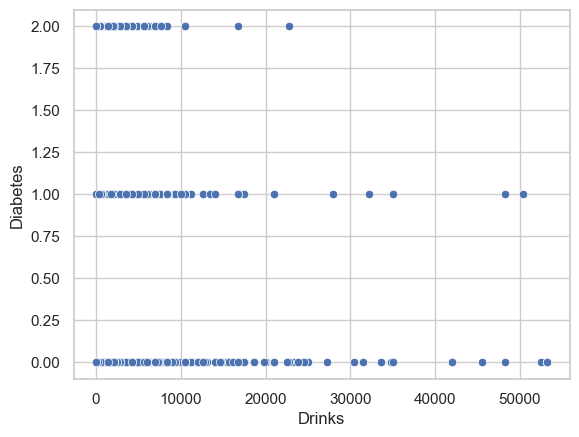

In [282]:
sns.scatterplot(num,x='Drinks',y='Diabetes')

<Axes: >

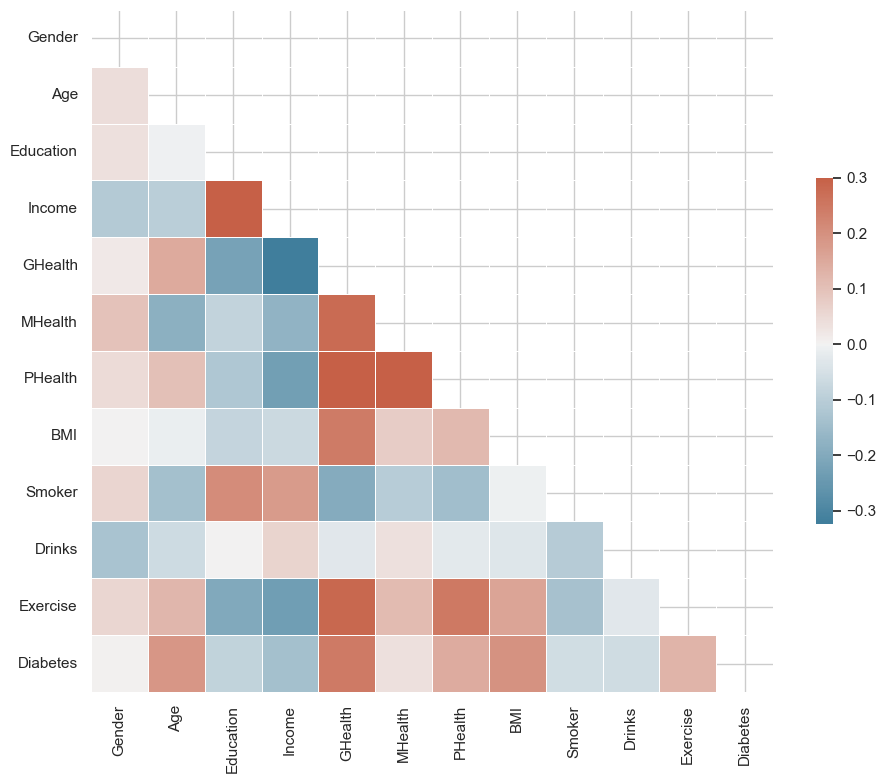

In [197]:
corr = df.corr()

import numpy as np
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [206]:
num

,MHealth,PHealth,BMI,Drinks,Diabetes
0,0.000000,0.000000,0.169626,0.000000,0
1,0.100000,0.066667,0.158411,0.000000,0
2,0.000000,0.066667,0.113551,0.002632,0
3,0.000000,0.000000,0.127453,0.004380,0
4,0.000000,0.000000,0.184112,0.000000,0
...,...,...,...,...,...
296456,0.233333,0.000000,0.143575,0.000000,0
296457,0.500000,0.000000,0.208061,0.007519,1
296458,0.000000,0.000000,0.223598,0.003515,0
296459,0.066667,0.066667,0.194042,0.000000,0


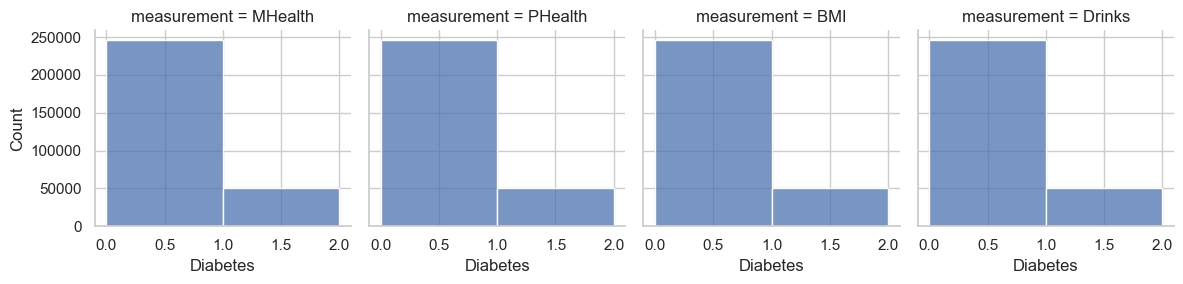

In [289]:
sns.displot(
    df1, x="Diabetes", col="measurement", #col="Diabetes",
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
)

In [273]:
np.sort(num['Drinks'])

array([5.39760535e-79, 5.39760535e-79, 5.39760535e-79, ...,
       5.32000000e+04, 5.32000000e+04, 5.32000000e+04])

<Axes: xlabel='Drinks', ylabel='Count'>

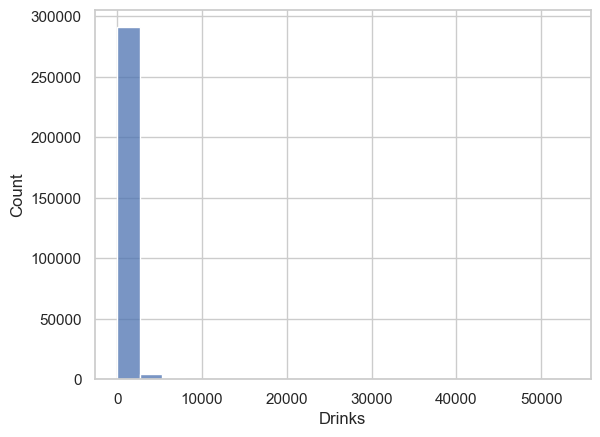

In [270]:
sns.histplot(num['Drinks'],bins=20)

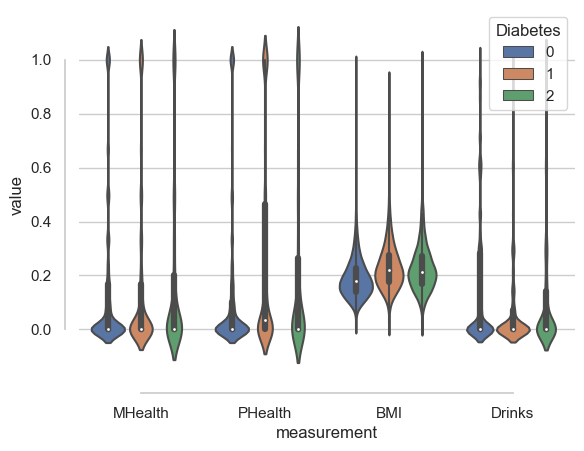

In [242]:
sns.violinplot(x="measurement", y="value",
            hue="Diabetes",
            data=df1)
sns.despine(offset=10, trim=True)

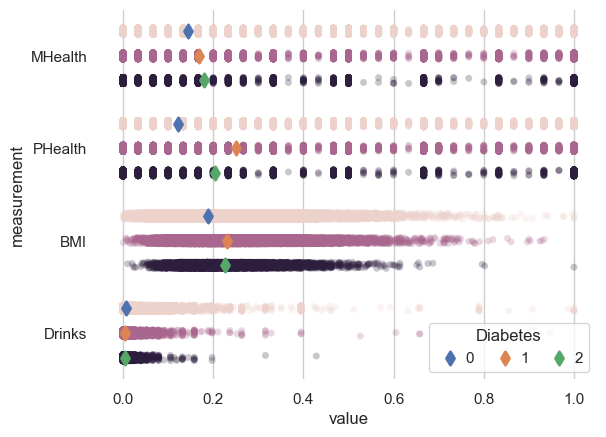

In [203]:
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")



# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=df1, x="value", y="measurement", hue="Diabetes",
    dodge=True, alpha=.25, zorder=1, legend=False,
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=df1, x="value", y="measurement", hue="Diabetes",
    dodge=.8 - .8 / 3, errorbar=None,
    markers="d", linestyles="none",
)

# Improve the legend
sns.move_legend(
    ax, loc="lower right", ncol=3, frameon=True, columnspacing=1, handletextpad=0,
)